### What is the causal effect of heat waves on electricity demand in California during the summer?

California's largest source of renewable energy comes from solar and it is the nation's top solar energy producer, making it a worthy state to examine the implications of extreme weather events, that are increasing due to the impacts of climate change, on energy distribution & usage. 

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def eda(data):
    df = data.copy()
    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]
    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')
    df['day'] = df['Local date'].dt.day
    df['month'] = df['Local date'].dt.month
    df['year'] = df['Local date'].dt.year
    df['dotw'] = df['Local date'].dt.dayofweek
    df = df[df['year'] >= 2019]
    df['Hour'] = df['Hour'] - 1
    df = df[~((df['day'] == 18) & (df['month'] == 11) & (df['year'] == 2024))]
    df = df[~((df['day'] == 17) & (df['month'] == 11) & (df['year'] == 2024))]
    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')
    return df

In [38]:
california = eda(pd.read_csv('california.csv', low_memory=False))

In [39]:
summer_2024 = pd.read_csv('2024_Summer.csv')
summer_2023 = pd.read_csv('2023_Summer.csv')
summer_2022 = pd.read_csv('2022_Summer.csv')
summer_2021 = pd.read_csv('2021_Summer.csv')
summer_2024_cleaned = summer_2024[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']]
summer_2023_cleaned = summer_2023[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']]
summer_2022_cleaned = summer_2022[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']]
summer_2021_cleaned = summer_2021[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']]

In [42]:
all_summer_data = pd.concat([summer_2024_cleaned, 
                             summer_2023_cleaned, 
                             summer_2022_cleaned, 
                             summer_2021_cleaned], 
                            ignore_index=True)

In [44]:
all_summer_data

,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,2024-06-01,NaN,NaN,NaN,72.0,85.0,59.0
1,2024-06-02,NaN,NaN,NaN,69.0,84.0,56.0
2,2024-06-03,NaN,NaN,NaN,65.0,74.0,58.0
3,2024-06-04,NaN,NaN,NaN,77.0,94.0,58.0
4,2024-06-05,NaN,NaN,NaN,83.0,99.0,69.0
...,...,...,...,...,...,...,...
446747,2021-09-11,NaN,NaN,NaN,68.0,73.0,62.0
446748,2021-09-12,NaN,NaN,NaN,64.0,71.0,58.0
446749,2021-09-13,NaN,NaN,NaN,59.0,64.0,55.0
446750,2021-09-14,NaN,NaN,NaN,61.0,68.0,53.0


In [46]:
# Ensure the 'Local date' in energy data is in date format (strip time if necessary)
california['Local date'] = pd.to_datetime(california['Local date']).dt.date

# Ensure the 'DATE' in temperature data is in date format
all_summer_data['DATE'] = pd.to_datetime(all_summer_data['DATE']).dt.date

# Merge the datasets on the date columns
# Since we want to retain all rows in filtered_data and append the temperature data, use a 'left' join
combined_data = pd.merge(
    california,
    all_summer_data,
    left_on='Local date',
    right_on='DATE',
    how='right'
)

# Drop the duplicate 'DATE' column from all_summer_data if needed
combined_data.drop(columns=['DATE'], inplace=True)

# Display the combined dataset
combined_data

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,day,month,year,dotw,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,CAL,01Jun2024 8:00:00,2024-06-01,0,01Jun2024 1:00:00,Pacific,"28,610",30166,"22,918",277,...,1,6,2024,5,NaN,NaN,NaN,72.0,85.0,59.0
1,CAL,01Jun2024 9:00:00,2024-06-01,1,01Jun2024 2:00:00,Pacific,"27,237",28869,"22,251",353,...,1,6,2024,5,NaN,NaN,NaN,72.0,85.0,59.0
2,CAL,01Jun2024 10:00:00,2024-06-01,2,01Jun2024 3:00:00,Pacific,"26,090",27778,"21,138",290,...,1,6,2024,5,NaN,NaN,NaN,72.0,85.0,59.0
3,CAL,01Jun2024 11:00:00,2024-06-01,3,01Jun2024 4:00:00,Pacific,"25,390",26822,"20,367",277,...,1,6,2024,5,NaN,NaN,NaN,72.0,85.0,59.0
4,CAL,01Jun2024 12:00:00,2024-06-01,4,01Jun2024 5:00:00,Pacific,"25,109",26051,"19,174",301,...,1,6,2024,5,NaN,NaN,NaN,72.0,85.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722043,CAL,16Sep2021 3:00:00,2021-09-15,19,15Sep2021 20:00:00,Pacific,"41,981",41497,"30,099","1,803",...,15,9,2021,2,NaN,NaN,NaN,61.0,67.0,57.0
10722044,CAL,16Sep2021 4:00:00,2021-09-15,20,15Sep2021 21:00:00,Pacific,"40,055",39643,"28,193","1,803",...,15,9,2021,2,NaN,NaN,NaN,61.0,67.0,57.0
10722045,CAL,16Sep2021 5:00:00,2021-09-15,21,15Sep2021 22:00:00,Pacific,"37,468",37327,"25,969","1,804",...,15,9,2021,2,NaN,NaN,NaN,61.0,67.0,57.0
10722046,CAL,16Sep2021 6:00:00,2021-09-15,22,15Sep2021 23:00:00,Pacific,"34,322",34385,"23,023","1,805",...,15,9,2021,2,NaN,NaN,NaN,61.0,67.0,57.0


In [74]:
combined_data['cleaned_solar'] = pd.to_numeric(combined_data['NG: SUN'], errors='coerce')
combined_data['solar_day_sum'] = combined_data.groupby(combined_data['Local date'].dt.date)['cleaned_solar'].transform('sum')

In [108]:
# Assuming 'combined_data' is your DataFrame and 'TMAX' is the column for maximum temperatures

# Step 1: Calculate the 95th percentile of TMAX
tmax_95th_percentile = combined_data['TAVG'].quantile(0.95)

# Step 2: Filter the DataFrame for days with TMAX in the 5th percentile highest temperatures
combined_data['Extreme'] = combined_data['TAVG'] >= tmax_95th_percentile

# Display the filtered DataFrame
combined_data

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,SNWD,TAVG,TMAX,TMIN,cleaned_solar,Extreme,sum_ng_sun,solar_day_avg,solar_day_sum,pscore
0,CAL,01Jun2024 8:00:00,2024-06-01,0,01Jun2024 1:00:00,Pacific,"28,610",30166,"22,918",277,...,0.0,72.0,85.0,59.0,112.0,False,"1122002041881391445334,84011,34313,83515,36116...",2256612.0,2256612.0,0.102463
1,CAL,01Jun2024 9:00:00,2024-06-01,1,01Jun2024 2:00:00,Pacific,"27,237",28869,"22,251",353,...,0.0,72.0,85.0,59.0,200.0,False,"1122002041881391445334,84011,34313,83515,36116...",2256612.0,2256612.0,0.102463
2,CAL,01Jun2024 10:00:00,2024-06-01,2,01Jun2024 3:00:00,Pacific,"26,090",27778,"21,138",290,...,0.0,72.0,85.0,59.0,204.0,False,"1122002041881391445334,84011,34313,83515,36116...",2256612.0,2256612.0,0.102463
3,CAL,01Jun2024 11:00:00,2024-06-01,3,01Jun2024 4:00:00,Pacific,"25,390",26822,"20,367",277,...,0.0,72.0,85.0,59.0,188.0,False,"1122002041881391445334,84011,34313,83515,36116...",2256612.0,2256612.0,0.102463
4,CAL,01Jun2024 12:00:00,2024-06-01,4,01Jun2024 5:00:00,Pacific,"25,109",26051,"19,174",301,...,0.0,72.0,85.0,59.0,139.0,False,"1122002041881391445334,84011,34313,83515,36116...",2256612.0,2256612.0,0.102463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722043,CAL,16Sep2021 3:00:00,2021-09-15,19,15Sep2021 20:00:00,Pacific,"41,981",41497,"30,099","1,803",...,0.0,61.0,67.0,57.0,-44.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612...",774900.0,774900.0,0.121610
10722044,CAL,16Sep2021 4:00:00,2021-09-15,20,15Sep2021 21:00:00,Pacific,"40,055",39643,"28,193","1,803",...,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612...",774900.0,774900.0,0.121610
10722045,CAL,16Sep2021 5:00:00,2021-09-15,21,15Sep2021 22:00:00,Pacific,"37,468",37327,"25,969","1,804",...,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612...",774900.0,774900.0,0.121610
10722046,CAL,16Sep2021 6:00:00,2021-09-15,22,15Sep2021 23:00:00,Pacific,"34,322",34385,"23,023","1,805",...,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612...",774900.0,774900.0,0.121610


In [80]:
combined_data['Local date'] = pd.to_datetime(combined_data['Local date'])
combined_data['dotw'] = combined_data['Local date'].dt.weekday

In [82]:
combined_data['PRCP'] = combined_data['PRCP'].fillna(0)
combined_data['SNOW'] = combined_data['SNOW'].fillna(0)
combined_data['SNWD'] = combined_data['SNWD'].fillna(0)

combined_data['TAVG'] = combined_data.groupby('month')['TAVG'].transform(lambda x: x.fillna(x.mean()))
combined_data['TMAX'] = combined_data.groupby('month')['TMAX'].transform(lambda x: x.fillna(x.mean()))
combined_data['TMIN'] = combined_data.groupby('month')['TMIN'].transform(lambda x: x.fillna(x.mean()))


In [84]:
combined_data['sum_ng_sun'] = combined_data.groupby(combined_data['Local date'].dt.date)['NG: SUN'].transform('sum')

In [52]:
combined_data

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,dotw,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,cleaned_solar,Extreme,sum_ng_sun
0,CAL,01Jun2024 8:00:00,2024-06-01,0,01Jun2024 1:00:00,Pacific,"28,610",30166,"22,918",277,...,5,0.0,0.0,0.0,72.0,85.0,59.0,112.0,False,"1122002041881391445334,84011,34313,83515,36116..."
1,CAL,01Jun2024 9:00:00,2024-06-01,1,01Jun2024 2:00:00,Pacific,"27,237",28869,"22,251",353,...,5,0.0,0.0,0.0,72.0,85.0,59.0,200.0,False,"1122002041881391445334,84011,34313,83515,36116..."
2,CAL,01Jun2024 10:00:00,2024-06-01,2,01Jun2024 3:00:00,Pacific,"26,090",27778,"21,138",290,...,5,0.0,0.0,0.0,72.0,85.0,59.0,204.0,False,"1122002041881391445334,84011,34313,83515,36116..."
3,CAL,01Jun2024 11:00:00,2024-06-01,3,01Jun2024 4:00:00,Pacific,"25,390",26822,"20,367",277,...,5,0.0,0.0,0.0,72.0,85.0,59.0,188.0,False,"1122002041881391445334,84011,34313,83515,36116..."
4,CAL,01Jun2024 12:00:00,2024-06-01,4,01Jun2024 5:00:00,Pacific,"25,109",26051,"19,174",301,...,5,0.0,0.0,0.0,72.0,85.0,59.0,139.0,False,"1122002041881391445334,84011,34313,83515,36116..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722043,CAL,16Sep2021 3:00:00,2021-09-15,19,15Sep2021 20:00:00,Pacific,"41,981",41497,"30,099","1,803",...,2,0.0,0.0,0.0,61.0,67.0,57.0,-44.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612..."
10722044,CAL,16Sep2021 4:00:00,2021-09-15,20,15Sep2021 21:00:00,Pacific,"40,055",39643,"28,193","1,803",...,2,0.0,0.0,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612..."
10722045,CAL,16Sep2021 5:00:00,2021-09-15,21,15Sep2021 22:00:00,Pacific,"37,468",37327,"25,969","1,804",...,2,0.0,0.0,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612..."
10722046,CAL,16Sep2021 6:00:00,2021-09-15,22,15Sep2021 23:00:00,Pacific,"34,322",34385,"23,023","1,805",...,2,0.0,0.0,0.0,61.0,67.0,57.0,-41.0,False,"-42-41-41-41-42-429196,15610,41311,96012,68612..."


In [66]:
demand_by_hour = combined_data[['Hour', 'D']].groupby('Hour').mean()
demand_by_hour = demand_by_hour.drop(demand_by_hour.index[-1])

demand_by_hour_extreme = combined_data[combined_data['Extreme'] == True][['Hour', 'D']].groupby('Hour').mean()
demand_by_hour_extreme = demand_by_hour_extreme.drop(demand_by_hour_extreme.index[-1])

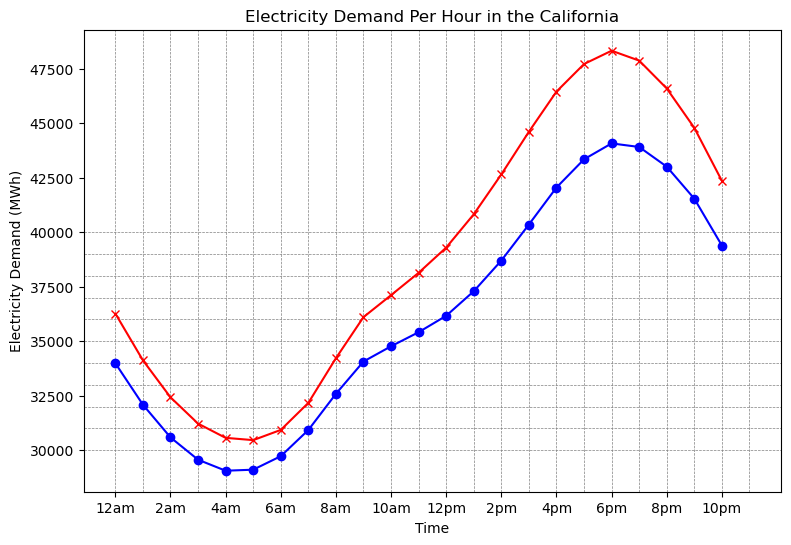

In [68]:
fig, ax = plt.subplots(figsize=(9, 6))
for y in np.arange(30000, 40000 + 1, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
for x in np.arange(0, 23 + 1, 1):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 24, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.plot(demand_by_hour.index, demand_by_hour['D'], label='Average Demand', color='blue', marker='o')
plt.plot(demand_by_hour_extreme.index, demand_by_hour_extreme['D'], label='Extreme Heat Demand', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MWh)')
plt.title('Electricity Demand Per Hour in the California');

In [120]:
X = combined_data[['dotw', 'month']]
y = combined_data['Extreme'] 

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
propensity_scores = model.predict_proba(X)[:, 1]

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
model = LogisticRegression()

X = combined_data[['dotw', 'month']]
y = combined_data['Extreme'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

In [111]:
propensity_scores = model.predict_proba(X)[:, 1]
propensity_df = pd.DataFrame(propensity_scores, columns=['Propensity Score'])
propensity_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Propensity Score
0,0.104986
1,0.104986
2,0.104986
3,0.104986
4,0.104986
...,...
10722043,0.125851
10722044,0.125851
10722045,0.125851
10722046,0.125851


In [114]:
combined_data['pscore'] = propensity_scores

In [116]:
narrowed_prop = combined_data[(combined_data['pscore'] > 0.1) & (combined_data['pscore'] < 0.9)]
n = len(narrowed_prop)
treated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 1].copy()
untreated_rows_cleaned = narrowed_prop.loc[narrowed_prop['Extreme'] == 0].copy()
treated_rows_cleaned['Weighted Demand'] = treated_rows_cleaned['D'] * (1 / treated_rows_cleaned['pscore'])
untreated_rows_cleaned['Weighted Demand'] = untreated_rows_cleaned['D'] * (1 / (1 - untreated_rows_cleaned['pscore']))
trimmed_ipw_estimate = ((1 / n) * treated_rows_cleaned['Weighted Demand'].sum()) - ((1 / n) * untreated_rows_cleaned['Weighted Demand'].sum())
trimmed_ipw_estimate

-19731.561460633537

In [118]:
print(treated_rows_cleaned['pscore'].describe())
print(untreated_rows_cleaned['pscore'].describe())

count    483504.000000
mean          0.115578
std           0.009245
min           0.102093
25%           0.108526
50%           0.114704
75%           0.121823
max           0.140215
Name: pscore, dtype: float64
count    8.048424e+06
mean     1.159255e-01
std      9.856897e-03
min      1.020935e-01
25%      1.079501e-01
50%      1.147042e-01
75%      1.224626e-01
max      1.402154e-01
Name: pscore, dtype: float64


In [72]:
nan_columns = combined_data.columns[combined_data.isna().any()]

# Display the columns with NaN values
print("Columns with NaN values:", nan_columns.tolist())

Columns with NaN values: ['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'cleaned_solar']
